In [1]:
#Download basic packages
import pandas as pd
import numpy as np
import sklearn

1. Ingest and process the customer reviews dataset

In [2]:
#import reviews
df = pd.read_csv("customer_reviews.csv", index_col=0)
df.head()

,reviewContent,rating
0,Let me begin by saying that there are two kind...,5
1,The only place inside the Loop that you can st...,3
2,I have walked by the Tokyo Hotel countless tim...,5
3,"If you are considering staying here, watch thi...",1
4,"This place is disgusting, absolutely horrible,...",3


2. Create a binary class target column called pos_rev that is 1 if the rating is 4 or 5 and 0 otherwise. Set this as the target column (i.e. y).

In [3]:
#Create Binary
df["pos_rev"]= np.where(df["rating"] >= 4, 1, 0)
df.head()

,reviewContent,rating,pos_rev
0,Let me begin by saying that there are two kind...,5,1
1,The only place inside the Loop that you can st...,3,0
2,I have walked by the Tokyo Hotel countless tim...,5,1
3,"If you are considering staying here, watch thi...",1,0
4,"This place is disgusting, absolutely horrible,...",3,0


In [4]:
#Count Reviews
df["pos_rev"].value_counts()

pos_rev
1    1550
0     950
Name: count, dtype: int64

3. Split the data into train and test sets with an 80/20 split.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y = df["pos_rev"]

In [7]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(df["reviewContent"],
                                                   y,
                                                   test_size=0.20,
                                                   random_state=987)

4. Transform text using sklearn's CountVectorizer as a method of feature extraction. Explain how CountVectorizer works. How does it transform the text into numeric values?

CountVectorizer takes all of the words in a corpus and converts it to a binary 0 or 1 matrix that indicates whether or not the value occurred in each document. In the example below it removes stopwords like "is" or "and".

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
#vectorize
vec= CountVectorizer(stop_words='english')
X_train_vectorized = vec.fit_transform(X_train.values)
X_test_vectorized = vec.transform(X_test.values)

In [10]:
print(f"Samples (documents): {X_train_vectorized.shape[0]}")
print(f"Features: {X_test_vectorized.shape[1]}")

Samples (documents): 2000
Features: 11585


5. Fit and train a classification model with the following classification algorithms: logistic regression, naive bayes, and SGD classifier.

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
sgd_model = SGDClassifier(random_state=120)

sgd_model.fit(X_train_vectorized, y_train)

sgd_predictions = sgd_model.predict(X_test_vectorized)

In [13]:
#switch to a different method
logistic_model = LogisticRegression()

logistic_model.fit(X_train_vectorized, y_train)

log_predictions = logistic_model.predict(X_test_vectorized)

In [14]:
nb_class = MultinomialNB()

nb_class.fit(X_train_vectorized, y_train)

nb_predictions = nb_class.predict(X_test_vectorized)

6. Evaluate and compare the models' performance. What are the accuracy scores for each model? Create a plot that shows the F1 scores of the three different algorithms. 

In [15]:
#Classification report- f1 score bar plot- confusion matrix

In [16]:
print(f"Naive bayes accuracy: Predicted {metrics.accuracy_score(y_test, nb_predictions)*100}% correct \nLogistic Regression accuracy: Predicted {metrics.accuracy_score(y_test, log_predictions)*100}% correct \nSGD accuracy: Predicted {metrics.accuracy_score(y_test, sgd_predictions)*100}% correct")

Naive bayes accuracy: Predicted 79.4% correct 
Logistic Regression accuracy: Predicted 76.2% correct 
SGD accuracy: Predicted 75.6% correct


In [17]:
pd.DataFrame(metrics.confusion_matrix(y_test, nb_predictions, labels=[0,1]),
           columns= ["predicte positive review", "predicted non-positive review"],
           index=["actual positive review", "actual non-positive review"])

,predicte positive review,predicted non-positive review
actual positive review,104,72
actual non-positive review,31,293


In [18]:
print(metrics.classification_report(y_test, nb_predictions))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67       176
           1       0.80      0.90      0.85       324

    accuracy                           0.79       500
   macro avg       0.79      0.75      0.76       500
weighted avg       0.79      0.79      0.79       500



In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

nb= sklearn.metrics.f1_score(y_test, nb_predictions)
log= sklearn.metrics.f1_score(y_test, log_predictions)
sgd= sklearn.metrics.f1_score(y_test, sgd_predictions)
fscore = [nb, log, sgd]
types = ["nb", "log", "sgd"]

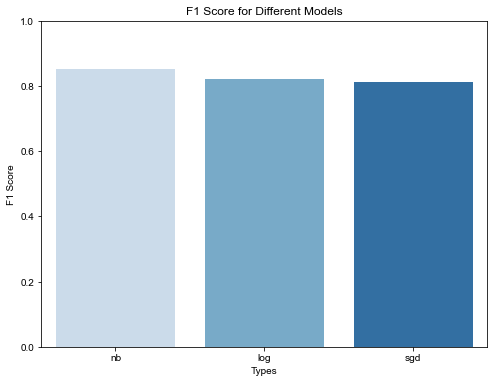

In [20]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=types, y=fscore, palette="Blues")
plt.xlabel("Types")
plt.ylabel("F1 Score")
plt.title("F1 Score for Different Models")
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1
plt.show()

7. Transform text using sklearn's TfidfVectorizer and go through steps #4, #5, and #6. Compare the performance of the models using CountVectorizer vs. TfidfVectorizer. Which combination of vectorizer and algorithm performs best? Are there additional adjustments you can make to further improve the performance? Explain how TfidfVectorizer works. How does it transform the text into numeric values?

With TFIDVectorizer, words are ranked by how uncommon they are. Works like is or was are given lower ranks whereas uncommon words like "shocked" or "devastated" are give a higher rank if they occure less frequently in the corpus.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vec= TfidfVectorizer(stop_words='english')
X_train_vectorized = vec.fit_transform(X_train.values)
X_test_vectorized = vec.transform(X_test.values)
print(f"Samples (documents): {X_train_vectorized.shape[0]}")
print(f"Features: {X_test_vectorized.shape[1]}")

Samples (documents): 2000
Features: 11585


In [23]:
sgd_model = SGDClassifier(random_state=120)

sgd_model.fit(X_train_vectorized, y_train)

sgd_predictions = sgd_model.predict(X_test_vectorized)

In [24]:
#switch to a different method
logistic_model = LogisticRegression()

logistic_model.fit(X_train_vectorized, y_train)

log_predictions = logistic_model.predict(X_test_vectorized)

In [25]:
nb_class = MultinomialNB()

nb_class.fit(X_train_vectorized, y_train)

nb_predictions = nb_class.predict(X_test_vectorized)

In [26]:
print(f"Naive bayes accuracy: Predicted {metrics.accuracy_score(y_test, nb_predictions)*100}% correct \nLogistic Regression accuracy: Predicted {metrics.accuracy_score(y_test, log_predictions)*100}% correct \nSGD accuracy: Predicted {metrics.accuracy_score(y_test, sgd_predictions)*100}% correct")

Naive bayes accuracy: Predicted 69.39999999999999% correct 
Logistic Regression accuracy: Predicted 79.60000000000001% correct 
SGD accuracy: Predicted 75.2% correct


In [27]:
print(metrics.classification_report(y_test, nb_predictions))

              precision    recall  f1-score   support

           0       1.00      0.13      0.23       176
           1       0.68      1.00      0.81       324

    accuracy                           0.69       500
   macro avg       0.84      0.57      0.52       500
weighted avg       0.79      0.69      0.61       500



In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

nb= sklearn.metrics.f1_score(y_test, nb_predictions)
log= sklearn.metrics.f1_score(y_test, log_predictions)
sgd= sklearn.metrics.f1_score(y_test, sgd_predictions)
fscore = [nb, log, sgd]
types = ["nb", "log", "sgd"]

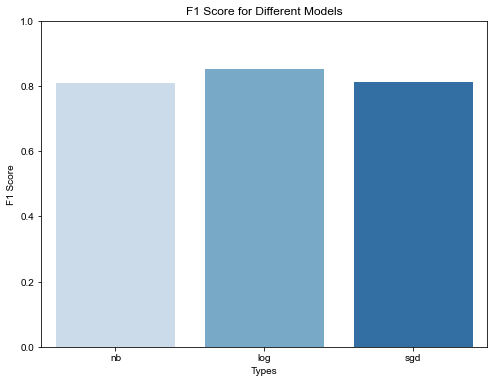

In [29]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=types, y=fscore, palette="Blues")
plt.xlabel("Types")
plt.ylabel("F1 Score")
plt.title("F1 Score for Different Models")
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1
plt.show()

8. Define a function called textclass_pred that takes one argument--open-ended text. The function should use the model you trained above to predict whether the text passed to the function is positive or negative, based on your trained model. The function should return a statement that indicates whether the text passed is positive or negative.


In [30]:
def textclass_pred(X_test):
    
    if isinstance(X_test, str):
        # If X_test is a single string, wrap it in a list
        X_test = [X_test]
    
    X_test_vectorized = vec.transform(X_test)
      
    sgd_predictions = sgd_model.predict(X_test_vectorized)
    
    answer = np.where(sgd_predictions >= 1, "This review is positive", "This review is negative")
    
    print(answer)
    

In [31]:
textclass_pred("I hate this place")

['This review is negative']


9. How could you apply the techniques used here to other text classification problems? What would you need to build the model?

This approach could be used in any circumstance where there are indications of a score to the problem. We have a 311 database at the city and after the work has been completed the person who submitted the 311 ticket can submit a review of the work and their satifaction. This could be used to train a model on reviewed work and perhaps it could be used to process tweets and see if the person is happy or not with work done by an agency.